# Analysis
Trend 1 Urban areas have the most users, drivers and fares.
Trend 2 Rural areas have the least users. 
Trend 3 rural & suburban areas have higher average fares than urban, but have much less drivers.

In [89]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [90]:
# read csv fike
city_data = "city_data.csv"
ride_data= "ride_data.csv"

In [91]:
# read data file with pandas
#encoding
ride_df= pd.read_csv(ride_data,encoding = "ISO-8859-1")
ride_df= ride_df.drop_duplicates()
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [92]:
city_df= pd.read_csv(city_data,encoding="ISO-8859-1")
city_df= city_df.drop_duplicates()
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [93]:
#merge two data by city
citymerge_df= pd.merge(city_df,ride_df,on="city")
citymerge_df= citymerge_df.drop_duplicates()
citymerge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [94]:
# Average fare per city
average_fare= citymerge_df.groupby(["city"]).mean()["fare"].rename("Average Fare")
average_fare_df=pd.DataFrame(average_fare)
average_fare_df.reset_index(level=0,inplace=True)
average_fare_df.round(2)

,city,Average Fare
0,Alvarezhaven,23.93
1,Alyssaberg,20.61
2,Anitamouth,37.32
3,Antoniomouth,23.62
4,Aprilchester,21.98
5,Arnoldview,25.11
6,Campbellport,33.71
7,Carrollbury,36.61
8,Carrollfort,25.40
9,Clarkstad,31.05


In [95]:
#Total number of rides per city
Total_rides=citymerge_df.groupby(["city"]).count()["ride_id"].rename("Total Rides")
Total_rides_df=pd.DataFrame(Total_rides)
Total_rides_df.reset_index(level=0,inplace=True)
Total_rides_df.head()

,city,Total Rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [96]:
# Total number of drivers per city
Total_driver= city_df.groupby(["city"]).sum()["driver_count"].rename("Total Number of Driver")
Total_driver_df=pd.DataFrame(Total_driver)
Total_driver_df.reset_index(level=0,inplace=True)
Total_driver_df.head()

,city,Total Number of Driver
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [97]:
# Seperate City Type (Urban, Suburban, Rural)
city_type= city_df[["city","type"]]
city_type.head()

,city,type
0,Kelseyland,Urban
1,Nguyenbury,Urban
2,East Douglas,Urban
3,West Dawnfurt,Urban
4,Rodriguezburgh,Urban


In [98]:
#create a summary table with city, average fare, total ride, driver count and city type
summary_table_df= pd.merge(average_fare_df,Total_rides_df,on="city")
summary_table_df=pd.merge(summary_table_df,Total_driver_df, on= "city")
summary_table_df=pd.merge(summary_table_df,city_type,on="city")
summary_table_df.head()

,city,Average Fare,Total Rides,Total Number of Driver,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


# Bubble Plot of Ride Sharing Data

In [99]:
urban_df=summary_table_df.loc[summary_table_df['type']=='Urban']
suburban_df=summary_table_df.loc[summary_table_df['type']=='Suburban']
rural_df=summary_table_df.loc[summary_table_df['type']=='Rural']
x_axis = int((summary_table_df['Total Number of Driver'].max()) * 1.2)
y_axis = int((summary_table_df['Average Fare'].max())* 1.2 )
size=summary_table_df['Total Rides']**1.4
urban = plt.scatter((urban_df['Total Number of Driver']), (urban_df['Average Fare']), marker="o", facecolors="purple", 
                     edgecolors="black",s=size, alpha=0.7)
suburban = plt.scatter((suburban_df['Total Number of Driver']),(suburban_df['Average Fare']), marker="o", facecolors="gold", 
                        edgecolors="black",s=size, alpha=0.7)
rural = plt.scatter((rural_df['Total Number of Driver']), (rural_df['Average Fare']), marker="o", facecolors="palegreen", 
                     edgecolors="black",s=size,alpha=0.7)
plt.legend((urban, suburban, rural), ("Urban", "Suburban", "Rurul"), loc="best")
plt.xlabel("Total Number of Driver(per city)")
plt.ylabel("Average Fare ($)")
plt.suptitle("Pyber Ride Share Data by City")
plt.title("Size Varies by Ride Count")

Text(0.5,1,'Size Varies by Ride Count')

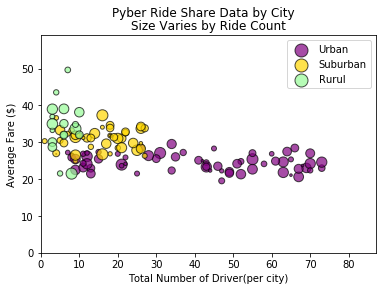

In [100]:
plt.ylim(0,y_axis)
plt.xlim(0,x_axis)
plt.show()

#  Total Fares by City Type (Pie Chart)

In [101]:
total_percent = citymerge_df.groupby('type')
fare_percent = total_percent['fare'].sum()/citymerge_df['fare'].sum()*100
ride_percent = total_percent['fare'].count()/citymerge_df['fare'].count()*100
driver_percent = total_percent['driver_count'].sum()/citymerge_df['driver_count'].sum()*100
total_percent = pd.DataFrame({"Fare %":fare_percent,"Ride %":ride_percent,"Driver %":driver_percent}).reset_index()
total_percent = total_percent.rename(columns={"type":"City Type"})
total_percent.round(2)

,City Type,Driver %,Fare %,Ride %
0,Rural,0.97,6.58,5.19
1,Suburban,12.98,31.45,27.30
2,Urban,86.05,61.97,67.51


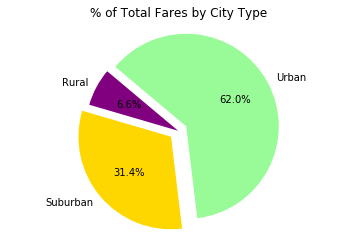

In [102]:
# % of Total Fares by City Type

labels = total_percent["City Type"]
sizes = total_percent["Fare %"]
colors = ["purple","gold","palegreen"]
explode = (0,0.1,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

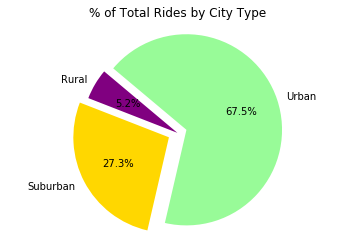

In [103]:
# % of Total Rides by City Type

labels = total_percent["City Type"]
sizes = total_percent["Ride %"]
colors = ["purple","gold","palegreen"]
explode = (0,0.1,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

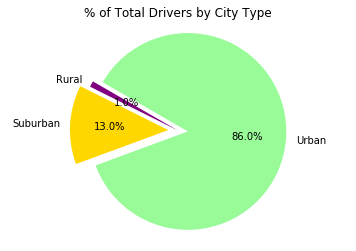

In [104]:
# % of Total Drivers by City Type

labels = total_percent["City Type"]
sizes = total_percent["Driver %"]
colors = ["purple","gold","palegreen"]
explode = (0,0.1,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=150)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()